# Capstone project

## Brazilian Amazon Rainforest Degradation 1999-2019

### Data Description

The dataset that will be analysed here is obtained by Kaggle, see the link below:

https://www.kaggle.com/mbogernetto/brazilian-amazon-rainforest-degradation?select=def_area_2004_2019.csv

The dataset contains total of 3 files, and here we will join files in order to answer on five questions that you can see it below. 

This file contain a total of 8 columns, which are: case_id, province, city, group, infection_case, confirmed, latitude, longitude

The dataset is analysed by using different python libraries: pandas and matplotlib.

Questions on which we will try to answer are:

- 1. Was there a decline or rise in the number of fire outbreaks?
- 2. Which state bears the greatest number of fire outbreaks?
- 3. Is there a correlation between storm incidence with the number of fire outbreaks?

If we can combine information with a file which has info about deforestation area, then we can ask additional questions
- 4. Show correlation plots with the deforestation area vs storm incidence or fire outbreaks?
- 5. On which month per year there is the biggest number of fire outbreaks?


In [2]:
# import libaries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [101]:
#import files
df_n = pd.read_csv('el_nino_la_nina_1999_2019.csv')
df_a = pd.read_csv('inpe_brazilian_amazon_fires_1999_2019.csv')
df_da = pd.read_csv('def_area_2004_2019.csv')

In [4]:
#check first 5 rows
df_n.head() #looks fine

,start year,end year,phenomenon,severity
0,2004,2005,El Nino,Weak
1,2006,2007,El Nino,Weak
2,2014,2015,El Nino,Weak
3,2018,2019,El Nino,Weak
4,2002,2003,El Nino,Moderate


In [6]:
#check first 5 rows in dataset
df_a.head() #looks fine

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [9]:
#check first 5 rows in dataset
df_da.head() #looks fine

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


### Explore datasets

In [5]:
# chech number of rows and columns in each dataset
print('The number of rows and columns in "El nino and el nina" dataset:', df_n.shape)
print('The number of rows and columns in "Brasilian amazon fires" dataset:', df_a.shape)
print('The number of rows and columns in "def_area:', df_da.shape)

The number of rows and columns in "El nino and el nina" dataset: (16, 4)
The number of rows and columns in "Brasilian amazon fires" dataset: (2104, 6)
The number of rows and columns in "def_area: (16, 11)


In [6]:
#Check for the datatypes of the columns in datasets
print('Data types:\n',df_n.dtypes)
print('\n')
print('Data types:\n',df_a.dtypes)
print('\n')
print('Data types:\n',df_da.dtypes)

Data types:
 start year     int64
end year       int64
phenomenon    object
severity      object
dtype: object


Data types:
 year           int64
month          int64
state         object
latitude     float64
longitude    float64
firespots      int64
dtype: object


Data types:
 Ano/Estados    int64
AC             int64
AM             int64
AP             int64
MA             int64
MT             int64
PA             int64
RO             int64
RR             int64
TO             int64
AMZ LEGAL      int64
dtype: object


In [7]:
# check for nulls in datasets
#display a summary of the dataset
print('def_area:\n',df_da.info())
print('elninolanina:\n',df_n.info())
print('brasilian_fires:\n', df_a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Ano/Estados  16 non-null     int64
 1   AC           16 non-null     int64
 2   AM           16 non-null     int64
 3   AP           16 non-null     int64
 4   MA           16 non-null     int64
 5   MT           16 non-null     int64
 6   PA           16 non-null     int64
 7   RO           16 non-null     int64
 8   RR           16 non-null     int64
 9   TO           16 non-null     int64
 10  AMZ LEGAL    16 non-null     int64
dtypes: int64(11)
memory usage: 1.5 KB
def_area:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start year  16 non-null     int64 
 1   end year    16 non-null     int64 
 2   phenomenon  16 non-null     object
 3   severity    16 

In [8]:
df_a.nunique()

year           21
month          12
state           9
latitude     2100
longitude    2102
firespots     954
dtype: int64

In [17]:
df_a_subset = df_a[['year', 'month', 'state', 'firespots']]
#df_a_subset['StateInitial'] = df_a_subset['state'].str[:2] this does not work since we have two states: Maranhao and Mato Grosso with same short initials
df_a_subset.head()

,year,month,state,firespots
0,1999,1,AMAZONAS,3
1,1999,1,MARANHAO,36
2,1999,1,MATO GROSSO,18
3,1999,1,PARA,87
4,1999,1,RONDONIA,1


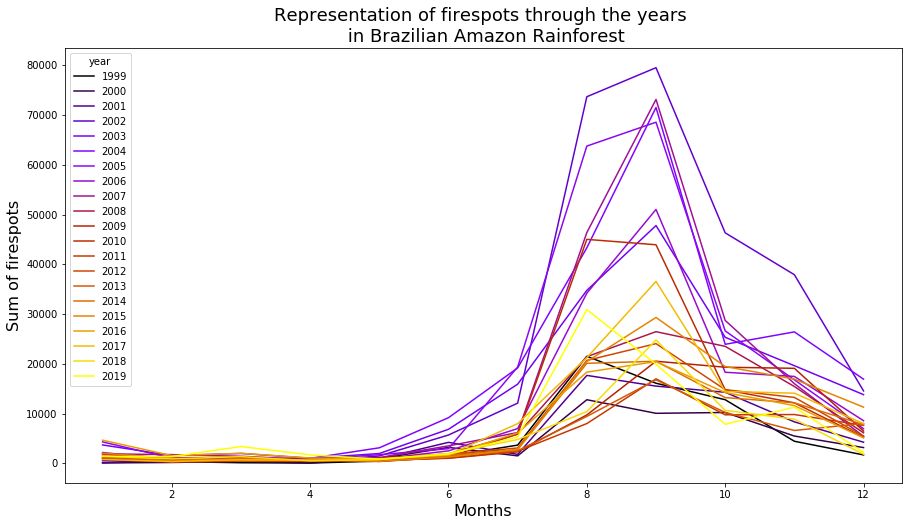

In [53]:
#Question 1 Was there a decline or rise in the number of fire outbreaks?
from matplotlib import cm
# plot
group = df_a_subset.groupby(['year', 'month'])['firespots'].sum().sort_values()
#cmap = cm.get_cmap('Spectral')  # list of colors https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
cmap = cm.get_cmap('gnuplot') 
group_plot = group.unstack(0).plot.line(figsize = (15,8),cmap=cmap)
group_plot.set_xlabel("Months", fontsize=16)
group_plot.set_ylabel("Sum of firespots", fontsize=16)
plt.title('Representation of firespots through the years \n in Brazilian Amazon Rainforest', fontsize=18)

plt.show ()

Answer to question 1:
As we can see from the line plot the most of the firespots occured durring the summer season. More over it is possible to see that highest number of firespots happened in the period between 2002 and 2010. 

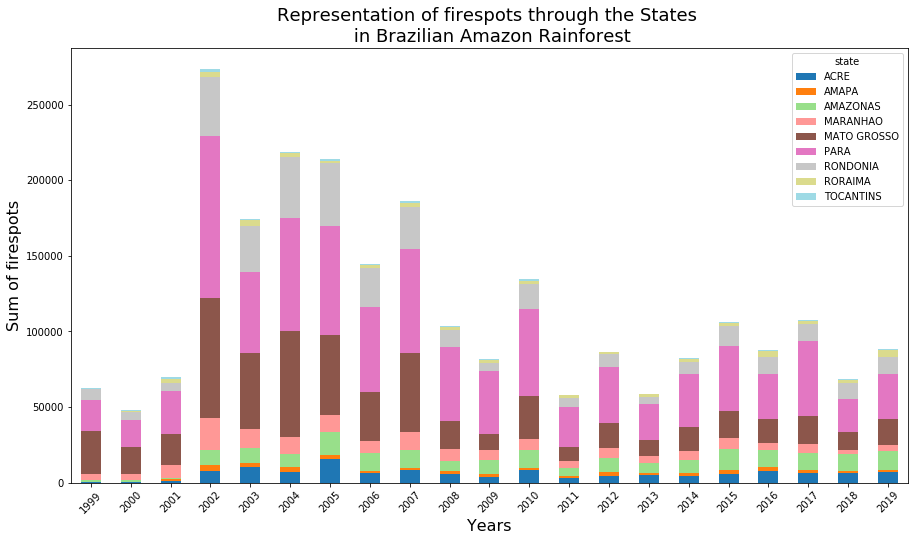

In [55]:
#Question 2: Which state bears the greatest number of fire outbreaks?
group2 = df_a_subset.groupby(['state', 'year'])['firespots'].sum().sort_values()
cmap = cm.get_cmap('tab20') 
group2_plot = group2.unstack(0).plot.bar(figsize = (15,8),cmap=cmap, rot=45, stacked=True)
group2_plot.set_xlabel("Years", fontsize=16)
group2_plot.set_ylabel("Sum of firespots", fontsize=16)
plt.title('Representation of firespots through the States \n in Brazilian Amazon Rainforest', fontsize=18)
plt.show ()


Answer: 

In [102]:
# Question 3: Is there a correlation between storm strength with the number of fire outbreaks?
# In order to obtain this information we have to join two tables
df_n.head()
df_n = df_n.rename(columns = {'start year':'year', 'end year':'end_year'})
#print(df_n.rename(columns = {'start year':'year'}))
merged = df_a_subset.merge(df_n, on = ['year'])

merged.head()

,year,month,state,firespots,end_year,phenomenon,severity
0,1999,1,AMAZONAS,3,2000,La Nina,Strong
1,1999,1,MARANHAO,36,2000,La Nina,Strong
2,1999,1,MATO GROSSO,18,2000,La Nina,Strong
3,1999,1,PARA,87,2000,La Nina,Strong
4,1999,1,RONDONIA,1,2000,La Nina,Strong


In [94]:
merged[['state']].drop_duplicates() # check occurence of phenomenon per year

,state
0,AMAZONAS
1,MARANHAO
2,MATO GROSSO
3,PARA
4,RONDONIA
5,RORAIMA
6,AMAPA
27,TOCANTINS
36,ACRE


### Explore merged dataset

In [65]:
merged.shape
# we can see that we have less rows than in df_a_subset
# it seems that there we do not have all records about La Nina and El Nino for all years
# check that info below

(1607, 7)

In [80]:
merged[['year', 'phenomenon']].drop_duplicates() # check occurence of phenomenon per year

,year,phenomenon
0,1999,La Nina
85,2000,La Nina
172,2002,El Nino
269,2004,El Nino
373,2005,La Nina
476,2006,El Nino
576,2007,La Nina
680,2008,La Nina
781,2009,El Nino
884,2010,La Nina


In [83]:
# check for duplications in whole merged dataset
merged.drop_duplicates(inplace = True)
merged.shape # we do not have any duplicate value in the merged dataset

(1607, 7)

### Try to pivot def_area file


In [103]:
df_da.head()

#change the column names
df_da = df_da.rename(columns = {'Ano/Estados':'year', 'AC':'ACRE', 'AM':'AMAZONAS', 
                             'AP':'AMAPA', 'MA':'MARANHAO', 'MT': 'MATO GROSSO', 'PA':'PARA',
                             'RO':'RONDONIA', 'RR':'RORAIMA', 'TO':'TOCANTINS'})


In order to merge with other tables we have to fix the column 'state' in merged file. 

In [107]:
melt_da = df_da.melt(id_vars=["year"], var_name="state", value_name="def_area")
melt_da.head()

,year,state,def_area
0,2004,ACRE,728
1,2005,ACRE,592
2,2006,ACRE,398
3,2007,ACRE,184
4,2008,ACRE,254


In [127]:
new_df = merged[['year','state', 'firespots','phenomenon','severity' ]]
new_df2 = new_df.groupby(['year','state','phenomenon','severity']).sum().reset_index() 
new_df2.head()

,year,state,phenomenon,severity,firespots
0,1999,ACRE,La Nina,Strong,347
1,1999,AMAPA,La Nina,Strong,101
2,1999,AMAZONAS,La Nina,Strong,1048
3,1999,MARANHAO,La Nina,Strong,4136
4,1999,MATO GROSSO,La Nina,Strong,28538


In [128]:
new_df2.shape

(144, 5)

In [130]:
#now merge def_area with already merged table

all_three_df = new_df2.merge(melt_da, on = ['year', 'state'])

all_three_df.head()


,year,state,phenomenon,severity,firespots,def_area
0,2004,ACRE,El Nino,Weak,7271,728
1,2004,AMAPA,El Nino,Weak,3413,46
2,2004,AMAZONAS,El Nino,Weak,8083,1232
3,2004,MARANHAO,El Nino,Weak,11443,755
4,2004,MATO GROSSO,El Nino,Weak,70422,11814


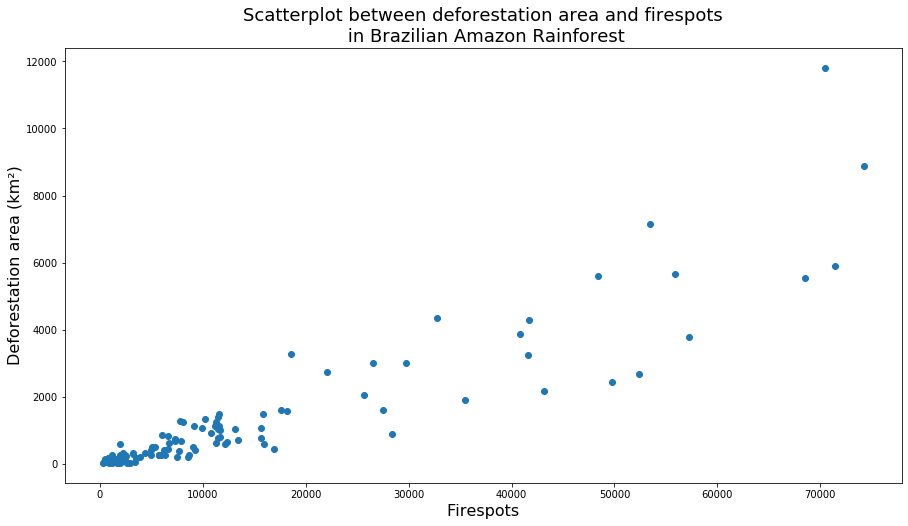

In [145]:
plt.figure(figsize=(15,8))
plt.scatter(all_three_df.firespots, all_three_df.def_area)
plt.xlabel("Firespots", fontsize=16)
plt.ylabel("Deforestation area (km²)", fontsize=16)
plt.title('Scatterplot between deforestation area and firespots\n in Brazilian Amazon Rainforest', fontsize=18)

#plt.legend(loc='upper left')
plt.show()

In [169]:
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import numpy as np

corr = pearsonr(all_three_df['def_area'], all_three_df['firespots'])
corr = [np.round(c, 2) for c in corr]
print(corr)
text = 'r=%s' % (corr[0])

[0.91, 0.0]


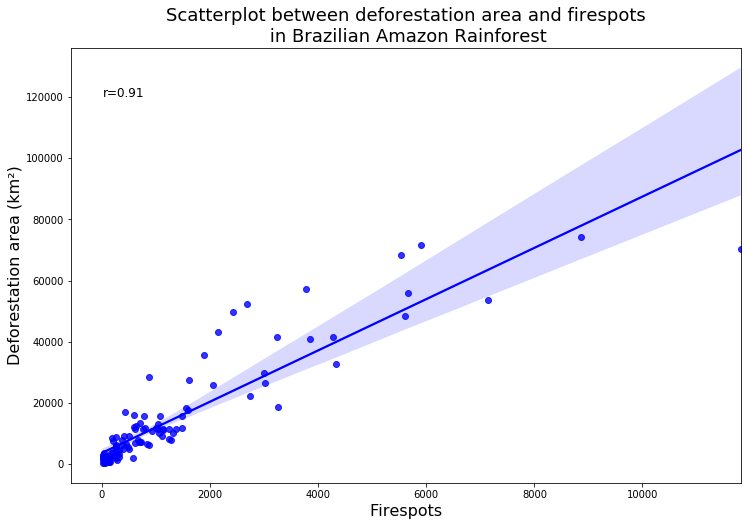

In [173]:
# use text to set line label for legend
plt.figure(figsize=(12,8))
corr_plot = sns.regplot(x=all_three_df["def_area"], y=all_three_df["firespots"], color='b') 
corr_plot.text(10, 120000, text, fontsize=12)
plt.xlabel("Firespots", fontsize=16)
plt.ylabel("Deforestation area (km²)", fontsize=16)
plt.title('Scatterplot between deforestation area and firespots\n in Brazilian Amazon Rainforest', fontsize=18)

plt.show()


In [ ]:
group+df_new = all_three_df.groupby(['severity', 'year'])['firespots'].sum().sort_values()

plt.figure(figsize=(15,8))
plt.scatter(all_three_df.firespots, all_three_df.def_area)
plt.xlabel("Firespots", fontsize=16)
plt.ylabel("Deforestation area (km²)", fontsize=16)
plt.title('Scatterplot between deforestation area and firespots\n in Brazilian Amazon Rainforest', fontsize=18)

#plt.legend(loc='upper left')
plt.show()